# Results of Stabilty Evaluation

In [1]:
import sys
import os
os.chdir("..")
PATH = os.getcwd()
sys.path.append(PATH)

In [2]:
import pandas as pd
import numpy as np

import os
import pickle
import random
import joblib

import EncoderFactory
from DatasetManager import DatasetManager
import BucketFactory

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statistics
import math

import warnings
warnings.filterwarnings('ignore')

sns.set_theme('paper', 'whitegrid')
sns.set_palette("hls")
cmap = sns.color_palette("copper", as_cmap=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
from scipy.stats import tmean, scoreatpercentile
def trimmean(arr, percent = 0.5):
    lower_limit = scoreatpercentile(arr, percent/2)
    upper_limit = scoreatpercentile(arr, 100-percent/2)
    #print(lower_limit, upper_limit)
    return tmean(arr, limits=(lower_limit, upper_limit), inclusive=(True, True))

<AxesSubplot:>

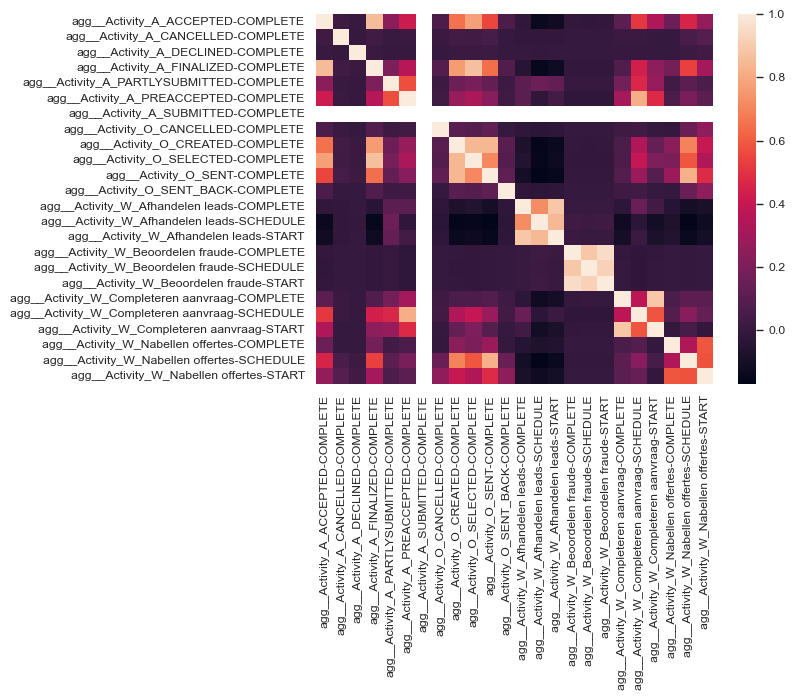

In [4]:
dataset_name = "bpic2012"
bucket = "single"
encoding="agg"
model="xgboost"

folder_loc = os.path.join(PATH, "%s/%s/%s_%s/" %(dataset_name,model, bucket, encoding))


sample = pd.read_csv(os.path.join(folder_loc, "train_data/train_data_bucket_1.csv"))
activity_cols = [col for col in sample.columns if "Activity" in col]
sns.heatmap(sample[activity_cols].corr())

# Model Accuracy

In [5]:
dataset_names = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models= ["xgboost", "logit", "nb"]

for dataset_name in dataset_names:
    print("________________________________________________________")
    for model in models:
        print(dataset_name, model)
        folder_loc = os.path.join(PATH, "%s/%s/" %(dataset_name,model))
        cls = joblib.load(os.path.join(folder_loc, "cls.joblib"))
        X_test = pd.read_csv(os.path.join(PATH, dataset_name, "datasets", dataset_name+"_Xtest.csv"), index_col=False, sep=";")
        y_test = pd.read_csv(os.path.join(PATH, dataset_name, "datasets", dataset_name+"_Ytest.csv"), index_col=False).values
        
        preds = cls.predict(X_test.values)
        print("F1 Score:", f1_score(y_test, preds))

________________________________________________________
breast_cancer xgboost
F1 Score: 0.9818181818181818
breast_cancer logit
F1 Score: 0.9818181818181818
breast_cancer nb
F1 Score: 0.923076923076923
________________________________________________________
compas xgboost
F1 Score: 0.7172413793103448
compas logit
F1 Score: 0.7172413793103448
compas nb
F1 Score: 0.7191780821917808
________________________________________________________
diabetes xgboost
F1 Score: 0.7179487179487181
diabetes logit
F1 Score: 0.6933333333333332
diabetes nb
F1 Score: 0.6575342465753423
________________________________________________________
income xgboost
F1 Score: 0.8300653594771242
income logit
F1 Score: 0.8128078817733991
income nb
F1 Score: 0.7998439328911432
________________________________________________________
iris xgboost
F1 Score: 1.0
iris logit
F1 Score: 1.0
iris nb
F1 Score: 1.0
________________________________________________________
mushroom xgboost
F1 Score: 1.0
mushroom logit
F1 Score: 1.

## Detailed Model Accuracy -  Event Logs

________________________________________________________
bpic2012 xgboost single_agg
single
F1 Score: 0.5352909665618402
bpic2012 xgboost prefix_agg
prefix
F1 Score: 0.5296261894695217
bpic2012 xgboost prefix_index
prefix
F1 Score: 0.4938325754203075


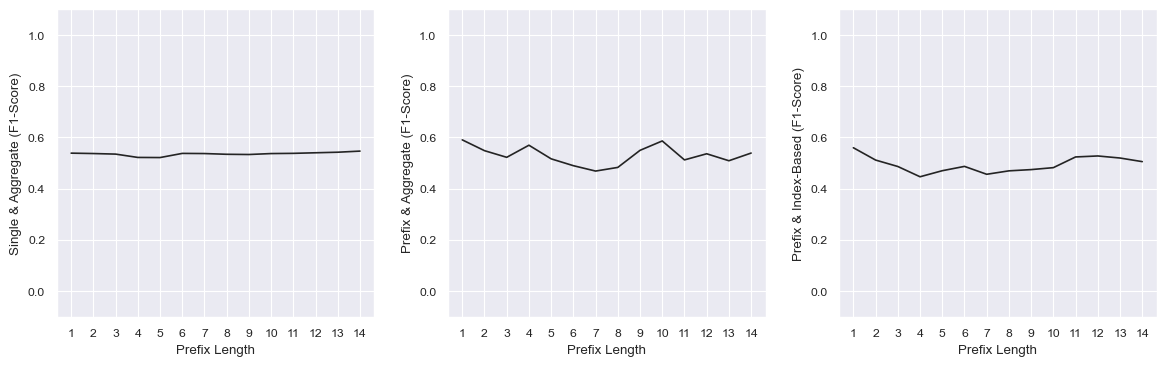

bpic2012 logit single_agg
single
F1 Score: 0.38189855206176543
bpic2012 logit prefix_agg
prefix
F1 Score: 0.4842990400438583
bpic2012 logit prefix_index
prefix
F1 Score: 0.2844119408820578


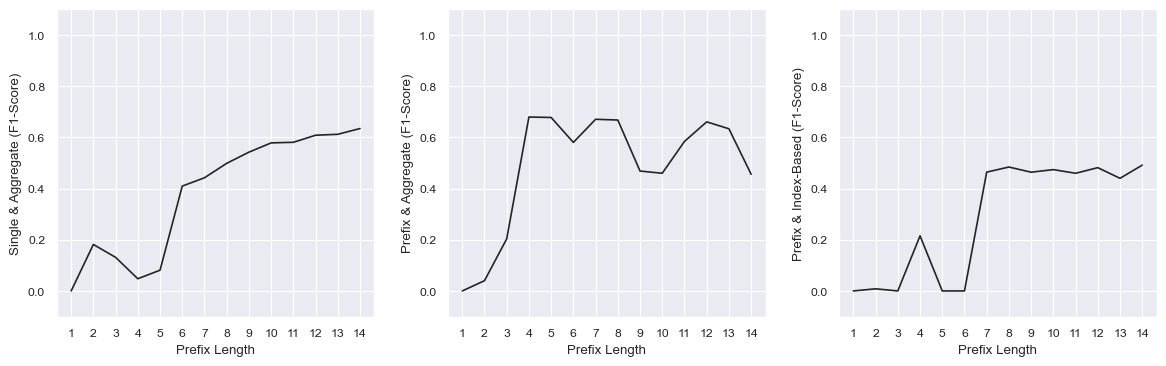

bpic2012 nb single_agg
single
F1 Score: 0.21283027989679873
bpic2012 nb prefix_agg
prefix
F1 Score: 0.29133917153796685
bpic2012 nb prefix_index
prefix
F1 Score: 0.4228874329456604


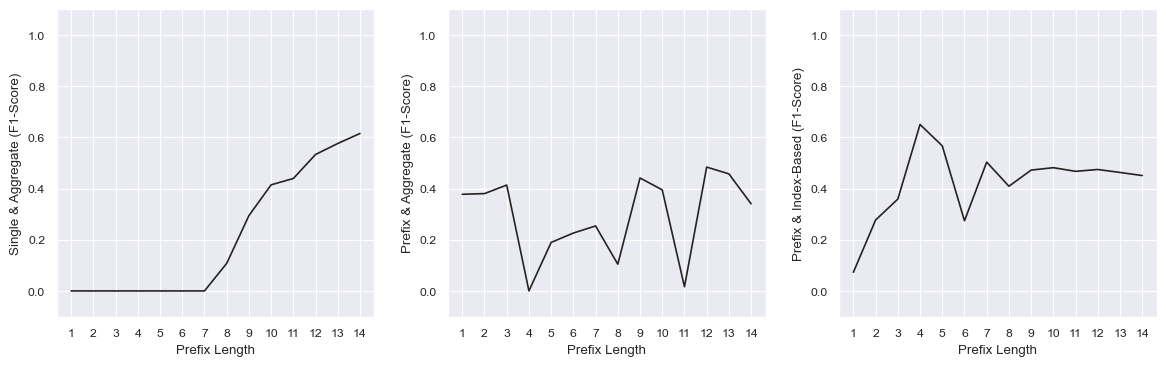

________________________________________________________
sepsis_cases xgboost single_agg
single
F1 Score: 0.1514010242255796
sepsis_cases xgboost prefix_agg
prefix
F1 Score: 0.221056361026813
sepsis_cases xgboost prefix_index
prefix
F1 Score: 0.23958667601039244


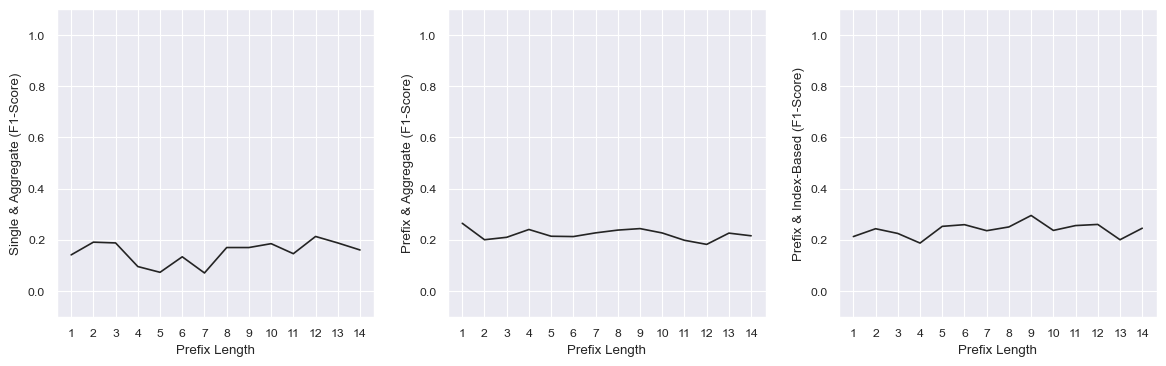

sepsis_cases logit single_agg
single
F1 Score: 0.21954231228739976
sepsis_cases logit prefix_agg
prefix
F1 Score: 0.2594798252894316
sepsis_cases logit prefix_index
prefix
F1 Score: 0.2361758819986548


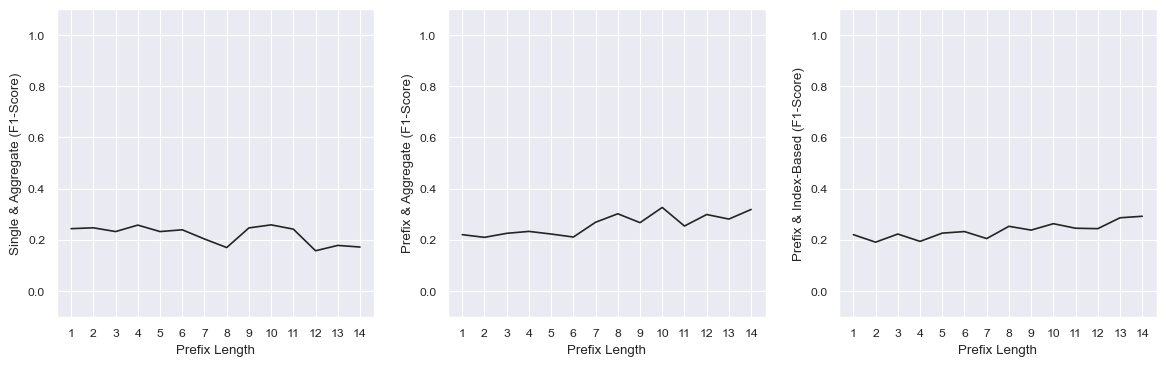

sepsis_cases nb single_agg
single
F1 Score: 0.19666799898973064
sepsis_cases nb prefix_agg
prefix
F1 Score: 0.19958386595801078
sepsis_cases nb prefix_index
prefix
F1 Score: 0.22128426756775418


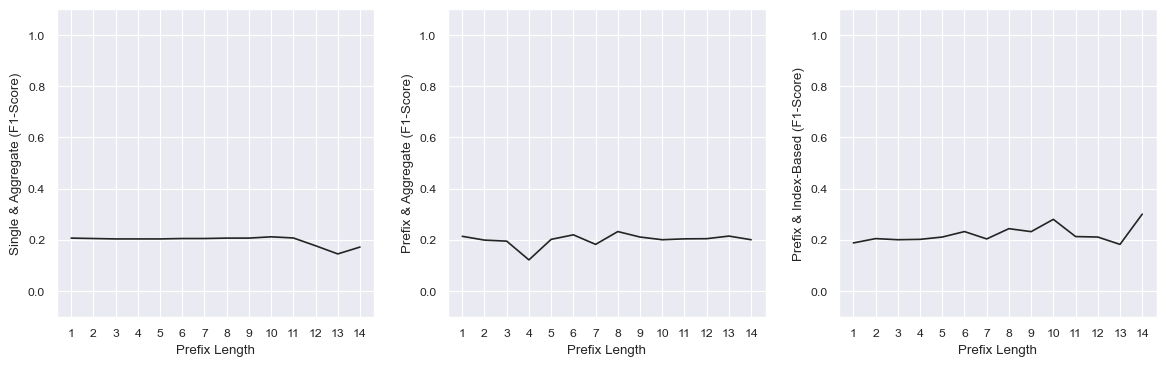

________________________________________________________
production xgboost single_agg
single
F1 Score: 0.6891720399083684
production xgboost prefix_agg
prefix
F1 Score: 0.6578065876400633
production xgboost prefix_index
prefix
F1 Score: 0.6102946706540696


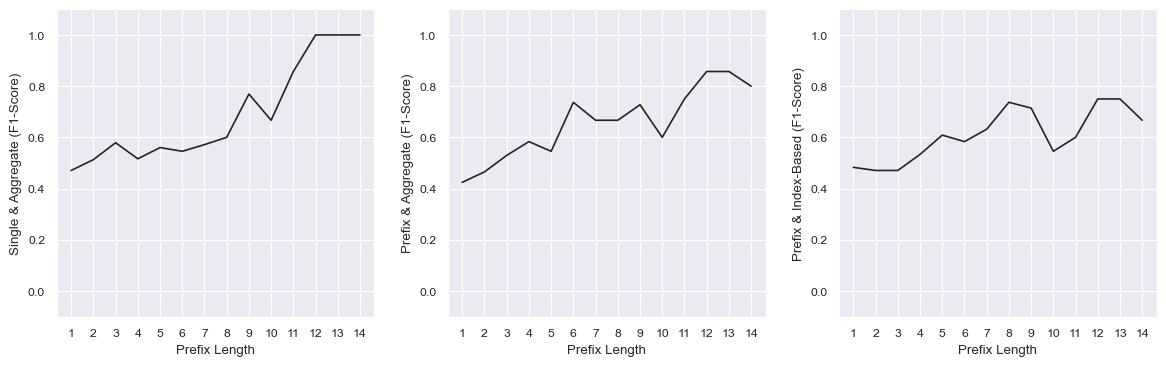

production logit single_agg
single
F1 Score: 0.5810076785411329
production logit prefix_agg
prefix
F1 Score: 0.5404892100380821
production logit prefix_index
prefix
F1 Score: 0.6266870759902119


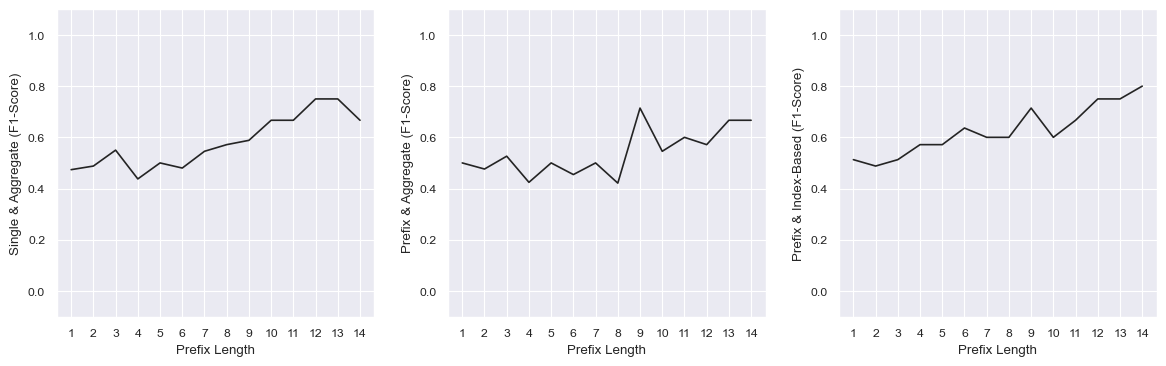

production nb single_agg
single
F1 Score: 0.33600863422292
production nb prefix_agg
prefix
F1 Score: 0.5320307069165308
production nb prefix_index
prefix
F1 Score: 0.6203841434213999


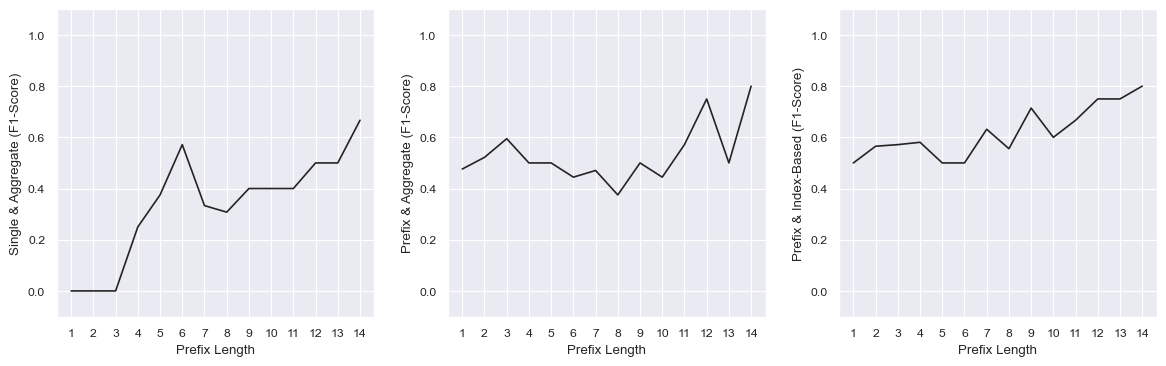

In [6]:
dataset_names = ["bpic2012", "sepsis_cases", "production"]
models= ["xgboost", "logit", "nb"]
preprocs = ["single_agg", "prefix_agg", "prefix_index"]

dataset_ref = {
    "bpic2012" : "bpic2012_accepted",
    "sepsis_cases": "sepsis_cases_1",
    "production" : "production"
}

preproc_ref = {
    "single_agg": "Single & Aggregate",
    "prefix_agg": "Prefix & Aggregate",
    "prefix_index": "Prefix & Index-Based"
}

sns.set_theme(context = "paper", style="darkgrid")
sns.set_palette("gray")

for dataset_name in dataset_names:
    print("________________________________________________________")
    
    dataset = dataset_ref[dataset_name]
    dataset_manager = DatasetManager(dataset)
    data = dataset_manager.read_dataset()

    min_prefix_length = 1
    max_prefix_length = 14

    dt_train_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/train_prefixes.csv" % (dataset_name)))
    dt_test_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/test_prefixes.csv" % (dataset_name)))
    dt_val_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/val_prefixes.csv" % (dataset_name)))
        
    dt_train_prefixes = pd.concat([dt_train_prefixes, dt_val_prefixes])

    dt_train_prefixes = dataset_manager.generate_prefix_data(dt_train_prefixes, min_prefix_length, max_prefix_length)
    dt_test_prefixes = dataset_manager.generate_prefix_data(dt_test_prefixes, min_prefix_length, max_prefix_length)
    
    
    for model in models:
        fig, ax = plt.subplots(1, 3, figsize=(12,4))
        for preproc in preprocs:
            idx = preprocs.index(preproc)
            print(dataset_name, model, preproc)
            
            if "single" in preproc:
                bucket_method = "single"
            else:
                bucket_method = "prefix"
            
            folder_loc = os.path.join(PATH, "%s/%s/%s" %(dataset_name,model,preproc))
            num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])
            
            bucketer_args = {'encoding_method':"agg",
                         'case_id_col':dataset_manager.case_id_col, 
                         'cat_cols':[dataset_manager.activity_col], 
                         'num_cols':[], 
                         'random_state':22}                
            bucketer = BucketFactory.get_bucketer(bucket_method, **bucketer_args)

            bucket_assignments_train = bucketer.fit_predict(dt_train_prefixes)
            bucket_assignments_test = bucketer.predict(dt_test_prefixes)
            
            f1 = []

            if bucket_method=="single":
                relevant_test_cases_bucket = dataset_manager.get_indexes(dt_test_prefixes)[bucket_assignments_test == 1]
                X_test = dataset_manager.get_relevant_data_by_indexes(dt_test_prefixes, relevant_test_cases_bucket)
                y_test = dataset_manager.get_label_numeric(X_test)

                pipeline = joblib.load(os.path.join(folder_loc,'pipelines/pipeline_bucket_1.joblib'))
                
                for bucket in range(1, max_prefix_length+1):
                    bucket_test = X_test[X_test["prefix_nr"]==bucket]
                    bucket_y = dataset_manager.get_label_numeric(bucket_test)
                    preds = pipeline.predict(bucket_test)
                    f1.append(f1_score(bucket_y, preds))

            else:
                for bucket in range(1, num_buckets+1):
                    relevant_test_cases_bucket = dataset_manager.get_indexes(dt_test_prefixes)[bucket_assignments_test == bucket]
                    X_test = dataset_manager.get_relevant_data_by_indexes(dt_test_prefixes, relevant_test_cases_bucket)
                    y_test = dataset_manager.get_label_numeric(X_test)
                    
                    pipeline = joblib.load(os.path.join(folder_loc,'pipelines/pipeline_bucket_%s.joblib' %(bucket)))
                    
                    preds = pipeline.predict(X_test)
                    
                    f1.append(f1_score(y_test, preds))

            print("F1 Score:", np.mean(f1))
            sns.lineplot(x=np.arange(1, max_prefix_length+1, 1), y=f1, ax=ax[idx], label="Precision", legend=False)
            ax[idx].set_xticks(np.arange(1, max_prefix_length+1, 1))
            ax[idx].set_ylim(-0.1, 1.1)
            ax[idx].set_xlabel("Prefix Length")
            ax[idx].set_ylabel(preproc_ref[preproc]+" (F1-Score)")
            
        filename = "%s___%s_acc.pdf"%(dataset_name,model)
        fig.tight_layout(pad=2)
        plt.savefig(os.path.join('figures', filename), format='pdf')
        plt.show()

## Stability
### Tabular Data

In [7]:
dataset_names = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models= ["xgboost", "logit", "nb"]

dataset = []
cls = []
sub_stab_mean = []
sub_stab_sd = []
weight_stab_mean = []
weight_stab_sd = []
xai = []
vec_lens = []

for model in models:
    for dataset_name in dataset_names:
        print("________________________________________________________")
        print(dataset_name)
        print(model)
        folder_loc = os.path.join(PATH, "%s/%s/" %(dataset_name,model))

        sample = pd.read_csv(os.path.join(folder_loc, "test_sample.csv"), sep=";")
        results = pd.read_csv(os.path.join(folder_loc, "results.csv"), sep=";")#.fillna(1)

        print ("SHAP Subset Stability")
        print("Overall", np.mean(results["SHAP Subset Stability"]))

        print ("SHAP Weight Stability")
        print("Overall", np.mean(results["SHAP Adjusted Weight Stability"]))

        print ("LIME Subset Stability")
        print("Overall", np.mean(results["LIME Subset Stability"]))

        print ("LIME Weight Stability")
        print("Overall", np.mean(results["LIME Adjusted Weight Stability"]))

        print ("ACV Subset Stability")
        print("Overall", np.mean(results["ACV Subset Stability"]))

        print ("ACV Weight Stability")
        print("Overall", np.mean(results["ACV Adjusted Weight Stability"]))

        print ("LINDA-BN Subset Stability")
        print("Overall", np.mean(results["LINDA Subset Stability"]))

        print ("LINDA-BN Weight Stability")
        print("Overall", np.mean(results["LINDA Adjusted Weight Stability"]))

________________________________________________________
breast_cancer
xgboost
SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 1.0
LIME Subset Stability
Overall 0.9434366104400003
LIME Weight Stability
Overall 0.9919727953699998
ACV Subset Stability
Overall 1.0
ACV Weight Stability
Overall 1.0
LINDA-BN Subset Stability
Overall 0.9989237024635255
LINDA-BN Weight Stability
Overall 1.0
________________________________________________________
compas
xgboost
SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 1.0
LIME Subset Stability
Overall 0.9922756051699999
LIME Weight Stability
Overall 0.9768832253600003
ACV Subset Stability
Overall 1.0
ACV Weight Stability
Overall 1.0
LINDA-BN Subset Stability
Overall 1.0
LINDA-BN Weight Stability
Overall 1.0
________________________________________________________
diabetes
xgboost
SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 1.0
LIME Subset Stability
Overall 0.96606685291
LIME Weight Stability
Overall 0.

In [8]:
dataset_names = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models= ["xgboost", "logit", "nb"]

dataset = []
cls = []
sub = []
weight = []
xai = []
vec_lens = []
probs = []

for model in models:
    for dataset_name in dataset_names:

        folder_loc = os.path.join(PATH, "%s/%s/" %(dataset_name,model))
        sample = pd.read_csv(os.path.join(folder_loc, "test_sample.csv"), sep=";")

        results = pd.read_csv(os.path.join(folder_loc, "results.csv"), sep=";")#.fillna(1)
        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        xai.extend(["SHAP"]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["SHAP Subset Stability"].values)
        weight.extend(results["SHAP Adjusted Weight Stability"].values)
        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        xai.extend(["LIME"]*sample.shape[0])
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["LIME Subset Stability"].values)
        weight.extend(results["LIME Adjusted Weight Stability"].values)

        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        xai.extend(["ACV"]*sample.shape[0])
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["ACV Subset Stability"].values)
        weight.extend(results["ACV Adjusted Weight Stability"].values)
        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        xai.extend(["LINDA"]*sample.shape[0])
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["LINDA Subset Stability"].values)
        weight.extend(results["LINDA Adjusted Weight Stability"].values)

df = pd.DataFrame(np.array([dataset, cls, sub, weight, xai, vec_lens, probs]).transpose(), 
                  columns = ["Dataset", "Model", "Subset Stability", "Weight Stability", "XAI Method", "Vector Length", "Prediction Probability"])
df = df.astype({"Dataset": "category", "Model": "category", "Subset Stability": "float32", "Weight Stability": "float32", 
                "XAI Method": "category", "Vector Length": "int32", "Prediction Probability": "float32"})

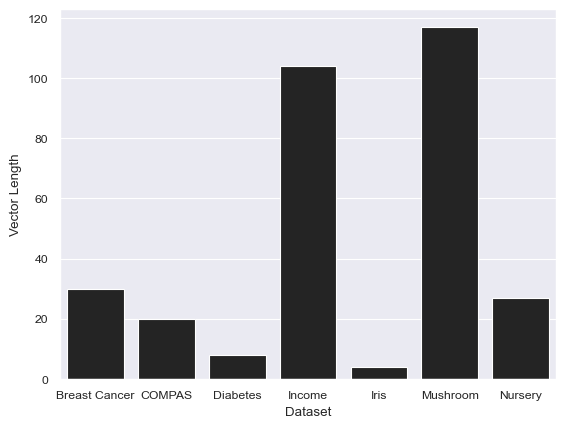

xgboost


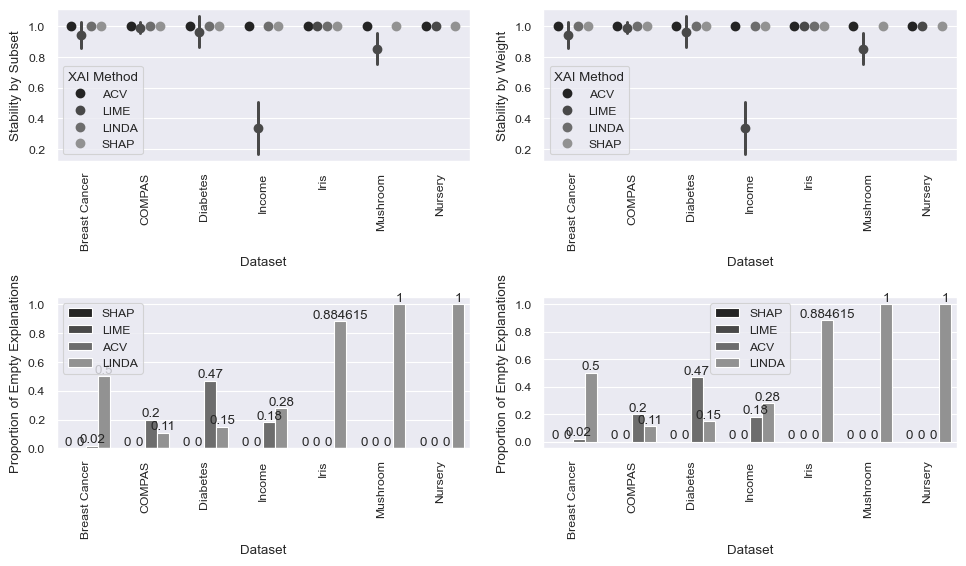

logit


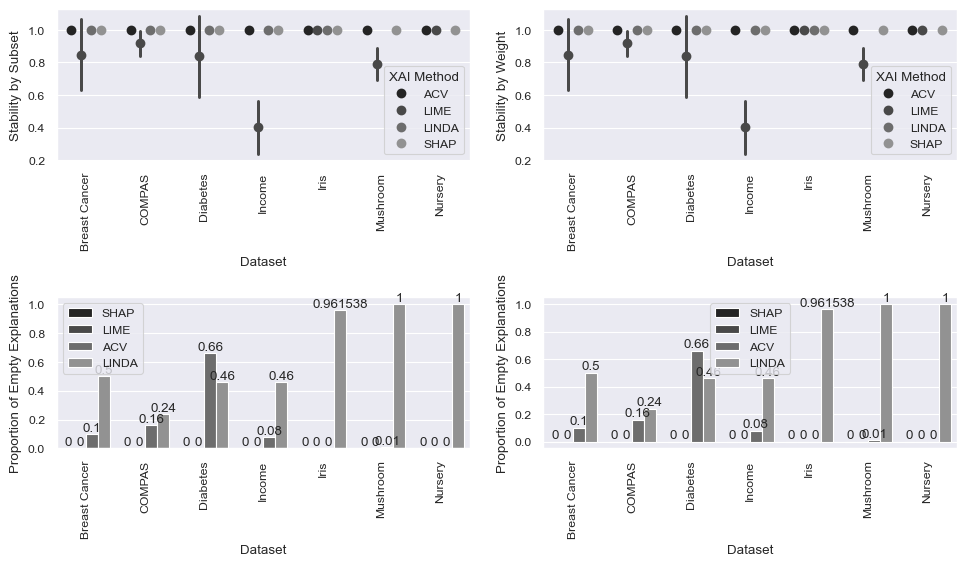

nb


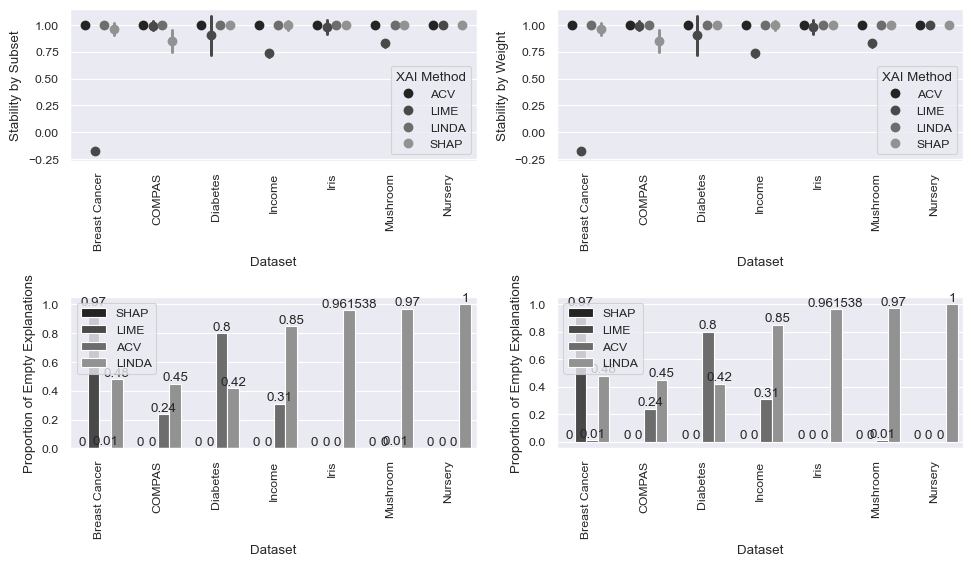

In [9]:
datasets = ["Breast Cancer", "COMPAS", "Diabetes", "Income", "Iris", "Mushroom", "Nursery"]

sns.barplot(data = df, x = "Dataset", y = "Vector Length")
plt.xticks(plt.xticks()[0], labels=datasets)
plt.show()

for model in models:
    print(model)
    mod_df = df[df["Model"]==model]
        
    fig, ax = plt.subplots(2, 2, figsize=(10, 6))

    sns.pointplot(data = mod_df, x = "Dataset", y = "Subset Stability", errorbar="sd", ax=ax[0][0], hue="XAI Method", dodge=0.5, join=False )

    ax[0][0].set_xlabel("Dataset")
    ax[0][0].set_ylabel("Stability by Subset")
    ax[0][0].set_xticklabels(datasets, rotation=90)
        
    sns.pointplot(data = mod_df, x = "Dataset", y = "Subset Stability", errorbar="sd", ax=ax[0][1], hue="XAI Method", dodge=0.5, join=False )
    
    ax[0][1].set_xlabel("Dataset")
    ax[0][1].set_ylabel("Stability by Weight")
    ax[0][1].set_xticklabels(datasets, rotation=90)
    
    data_labels = []
    empty_prop = []
    xai = []
    #grouped = mod_df.groupby("Dataset")
    
    for i in range(len(dataset_names)):
        data = dataset_names[i]
        data_df = mod_df[mod_df["Dataset"]==data]
        for xai_tech in mod_df["XAI Method"].unique():
            xai.append(xai_tech)
            data_labels.append(datasets[i])
            empty_prop.append(data_df[data_df["XAI Method"]==xai_tech]["Subset Stability"].isna().sum()/data_df[data_df["XAI Method"]==xai_tech].shape[0])
            
            
    al = sns.barplot(x = data_labels, y = empty_prop, hue=xai, ax = ax[1][0])
    ax[1][0].set_xlabel("Dataset")
    ax[1][0].set_ylabel("Proportion of Empty Explanations")
    ax[1][0].set_xticklabels(datasets, rotation=90)
    for container in al.containers:
        al.bar_label(container)
    
    data_labels = []
    empty_prop = []
    xai = []
    #grouped = mod_df.groupby("Dataset")
    
    for i in range(len(dataset_names)):
        data = dataset_names[i]
        data_df = mod_df[mod_df["Dataset"]==data]
        for xai_tech in mod_df["XAI Method"].unique():
            xai.append(xai_tech)
            data_labels.append(datasets[i])
            empty_prop.append(data_df[data_df["XAI Method"]==xai_tech]["Subset Stability"].isna().sum()/data_df[data_df["XAI Method"]==xai_tech].shape[0])
            
            
    al = sns.barplot(x = data_labels, y = empty_prop, hue=xai, ax = ax[1][1])
    ax[1][1].set_xlabel("Dataset")
    ax[1][1].set_ylabel("Proportion of Empty Explanations")
    ax[1][1].set_xticklabels(datasets, rotation=90)
    for container in al.containers:
        al.bar_label(container) 
    plt.ylim(-0.05, 1.05)

    fig.tight_layout(pad=2)
    plt.show()

In [10]:
prob = []
linda_attr = []
acv_attr = []
grouped = df.groupby(["Dataset", "Model"])
for _,group in grouped:
    prob.append(np.mean(group["Prediction Probability"].values))
    linda_attr.append(group[group["XAI Method"]=="LINDA"]["Subset Stability"].isna().sum()/group[group["XAI Method"]=="LINDA"].shape[0])
    acv_attr.append(group[group["XAI Method"]=="ACV"]["Subset Stability"].isna().sum()/group[group["XAI Method"]=="ACV"].shape[0])

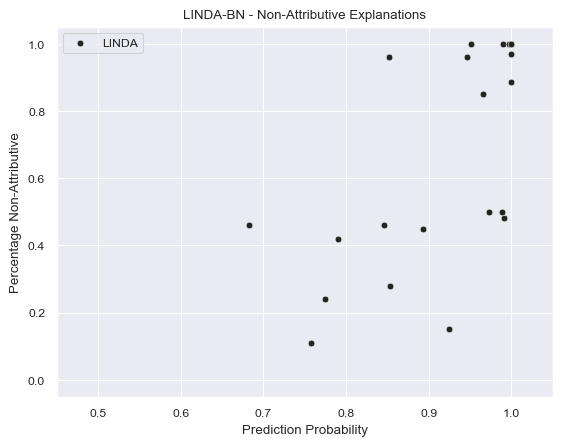

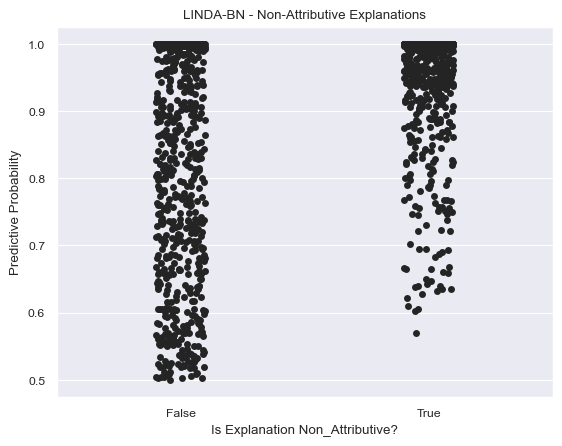

In [11]:
sns.scatterplot(x=prob, y=linda_attr, label = "LINDA")
plt.xlim(0.45, 1.05)
plt.ylim(-0.05, 1.05)
plt.title("LINDA-BN - Non-Attributive Explanations")
plt.xlabel("Prediction Probability")
plt.ylabel("Percentage Non-Attributive")
plt.show()

prob = df[df["XAI Method"]=="LINDA"]["Prediction Probability"].values
linda_attr = df[df["XAI Method"]=="LINDA"]["Subset Stability"].isna().values
sns.stripplot(x = linda_attr, y=prob)
plt.xlabel("Is Explanation Non_Attributive?")
plt.ylabel("Predictive Probability")
plt.title("LINDA-BN - Non-Attributive Explanations")
plt.show()

### Event Logs

In [12]:
dataset_names = ["bpic2012", "production", "sepsis_cases"]
preprocs = ["single_agg", "prefix_agg", "prefix_index"]
models= ["xgboost", "logit", "nb"]

for preproc in preprocs:
    for dataset_name in dataset_names:
        for model in models:
            print("________________________________________________________________________")
            print(dataset_name, model, preproc)
            folder_loc = os.path.join(PATH, "%s/%s/%s/" %(dataset_name,model,preproc))

            num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

            vec_lens = []

            for bucket in range(1, num_buckets+1):
                sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
                vec_lens.append(sample.shape[1])

            if len(vec_lens) == 1:
                vec_lens = vec_lens * 14

            pref_lens = np.arange(1,15,1)
            x_ticks = np.arange(1,15,1)

            results = pd.read_csv(os.path.join(folder_loc, "samples/results.csv"), sep=";")#.fillna(1)
            grouped = results.groupby("Prefix Length")

            print ("SHAP Subset Stability")
            print("Overall", np.mean(results["SHAP Subset Stability"]))

            print ("SHAP Weight Stability")
            print("Overall", np.mean(results["SHAP Adjusted Weight Stability"]))

            print ("LIME Subset Stability")
            print("Overall", np.mean(results["LIME Subset Stability"]))

            print ("LIME Weight Stability")
            print("Overall", np.mean(results["LIME Adjusted Weight Stability"]))

            print ("ACV Subset Stability")
            print("Overall", np.mean(results["ACV Subset Stability"]))

            print ("ACV Weight Stability")
            print("Overall", np.mean(results["ACV Adjusted Weight Stability"]))

            if preproc!="prefix_index":
                print ("LINDA-BN Subset Stability")
                print("Overall", np.mean(results["LINDA Subset Stability"]))

                print ("LINDA-BN Weight Stability")
                print("Overall", np.mean(results["LINDA Adjusted Weight Stability"]))


________________________________________________________________________
bpic2012 xgboost single_agg
SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 1.0
LIME Subset Stability
Overall 0.7634788228467148
LIME Weight Stability
Overall 0.9949674938778068
ACV Subset Stability
Overall 1.0
ACV Weight Stability
Overall 1.0
LINDA-BN Subset Stability
Overall 1.0
LINDA-BN Weight Stability
Overall 1.0
________________________________________________________________________
bpic2012 logit single_agg
SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 1.0
LIME Subset Stability
Overall 0.572219739477038
LIME Weight Stability
Overall 0.9929557698465185
ACV Subset Stability
Overall nan
ACV Weight Stability
Overall 1.0
LINDA-BN Subset Stability
Overall 1.0
LINDA-BN Weight Stability
Overall 1.0
________________________________________________________________________
bpic2012 nb single_agg
SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 0.99997712625062
LIME Sub

SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 0.9999999999999308
LIME Subset Stability
Overall 0.708910357663646
LIME Weight Stability
Overall 0.8524210933345955
ACV Subset Stability
Overall 1.0
ACV Weight Stability
Overall 1.0
________________________________________________________________________
production logit prefix_index
SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 1.0
LIME Subset Stability
Overall 0.6791504563154378
LIME Weight Stability
Overall 0.9562431530840589
ACV Subset Stability
Overall nan
ACV Weight Stability
Overall 1.0
________________________________________________________________________
production nb prefix_index
SHAP Subset Stability
Overall 0.9400540650413879
SHAP Weight Stability
Overall 0.9350696129909768
LIME Subset Stability
Overall 0.9291221885195879
LIME Weight Stability
Overall 0.9953638987238874
ACV Subset Stability
Overall nan
ACV Weight Stability
Overall 1.0
_________________________________________________________

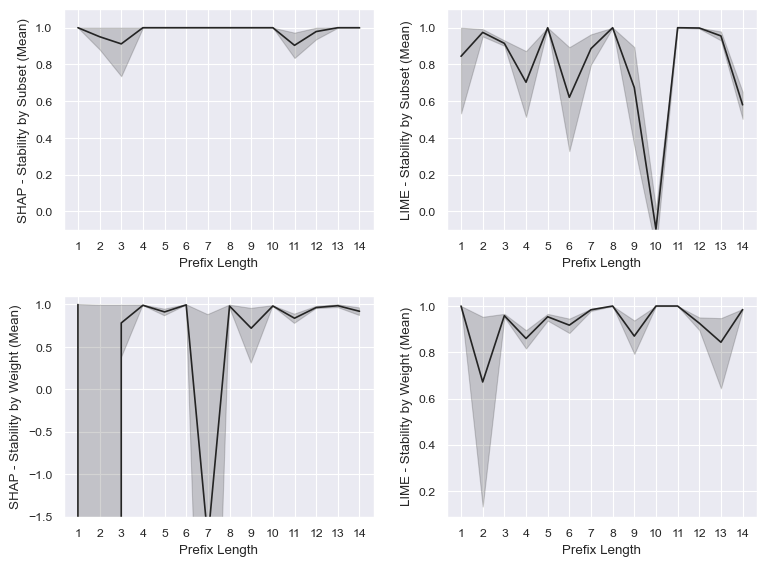

In [13]:
sns.set_theme(context = "paper", style="darkgrid")
sns.set_palette("gray")

dataset_name = "sepsis_cases"
bucketing = "prefix"
encoding="agg"
model="nb"

folder_loc = os.path.join(PATH, "%s/%s/%s_%s/" %(dataset_name,model, bucketing, encoding))

num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

vec_lens = []

for bucket in range(1, num_buckets+1):
    sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
    vec_lens.append(sample.shape[1])
    
if len(vec_lens) == 1:
    vec_lens = vec_lens * 14
    
pref_lens = np.arange(1,15,1)
x_ticks = np.arange(1,15,1)

results = pd.read_csv(os.path.join(folder_loc, "samples/results.csv"), sep=";")#.fillna(1)
grouped = results.groupby("Prefix Length")

    
fig, ax = plt.subplots(2, 2, figsize=(8,6))

sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "SHAP Subset Stability", 
errorbar=("ci",95), err_style="band", ax=ax[0][0], label="Stability", legend=False)
ax[0][0].set_xticks(x_ticks)
ax[0][0].set_ylim(-0.1,1.1)
plt.xlabel("Prefix Length")
ax[0][0].set_ylabel("SHAP - Stability by Subset (Mean)")

sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "SHAP Adjusted Weight Stability", errorbar=("ci",95), 
             err_style="band", ax=ax[1][0], label="Stability", legend=False)
ax[1][0].set_xticks(x_ticks)
ax[1][0].set_ylim(-1.5,1.1)
plt.xlabel("Prefix Length")
ax[1][0].set_ylabel("SHAP - Stability by Weight (Mean)")

sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "LIME Subset Stability", errorbar=("ci",95),
             err_style="band", ax=ax[0][1], label="Stability", legend=False)
ax[0][1].set_xticks(x_ticks)
ax[0][1].set_ylim(-0.1,1.1)
plt.xlabel("Prefix Length")
ax[0][1].set_ylabel("LIME - Stability by Subset (Mean)")

sns.lineplot(data = results.fillna(1), x = "Prefix Length", y = "LIME Adjusted Weight Stability", errorbar=("ci",95),
             err_style="band", ax=ax[1][1], label="Stability", legend=False)
ax[1][1].set_xticks(x_ticks)
plt.xlabel("Prefix Length")
ax[1][1].set_ylabel("LIME - Stability by Weight (Mean)")

filename = "%s__%s_%s_%s.pdf"%(dataset_name,bucketing,encoding,model)
fig.tight_layout(pad=2)
plt.savefig(os.path.join('figures',filename), format='pdf')
plt.show()

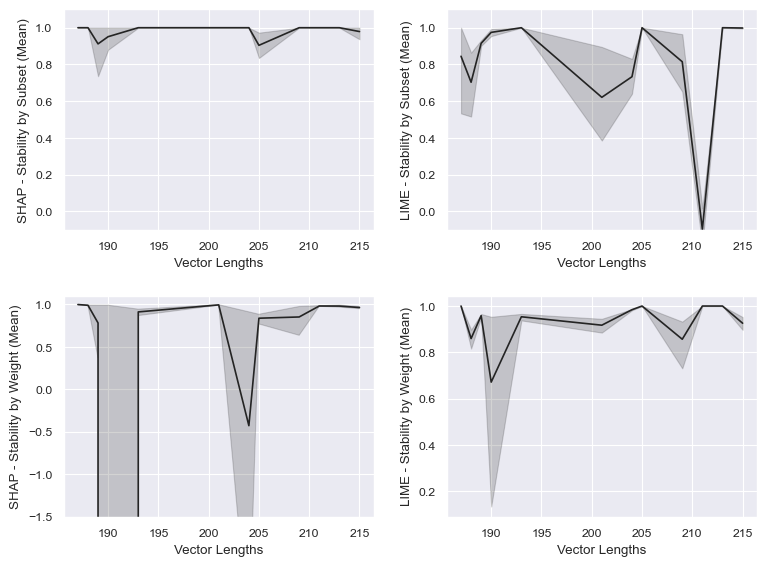

In [14]:
prefixes = results["Prefix Length"].tolist()
vectors = [vec_lens[int(i)-1] for i in prefixes]
results["Vector Lengths"] = vectors

fig, ax = plt.subplots(2, 2, figsize=(8,6))

sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "SHAP Subset Stability", 
errorbar=("ci",95), err_style="band", ax=ax[0][0], label="Stability", legend=False)
ax[0][0].set_ylim(-0.1,1.1)
plt.xlabel("Prefix Length")
ax[0][0].set_ylabel("SHAP - Stability by Subset (Mean)")

sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "SHAP Adjusted Weight Stability", errorbar=("ci",95), 
             err_style="band", ax=ax[1][0], label="Stability", legend=False)
ax[1][0].set_ylim(-1.5,1.1)
plt.xlabel("Prefix Length")
ax[1][0].set_ylabel("SHAP - Stability by Weight (Mean)")

sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "LIME Subset Stability", errorbar=("ci",95),
             err_style="band", ax=ax[0][1], label="Stability", legend=False)
ax[0][1].set_ylim(-0.1,1.1)
plt.xlabel("Prefix Length")
ax[0][1].set_ylabel("LIME - Stability by Subset (Mean)")

sns.lineplot(data = results.fillna(1), x = "Vector Lengths", y = "LIME Adjusted Weight Stability", errorbar=("ci",95),
             err_style="band", ax=ax[1][1], label="Stability", legend=False)
plt.xlabel("Vector Lengths")
ax[1][1].set_ylabel("LIME - Stability by Weight (Mean)")

fig.tight_layout(pad=2)
filename = "%s__%s_%s_%s_vec.pdf"%(dataset_name,bucketing,encoding,model)
plt.savefig(os.path.join('figures',filename), format='pdf')
plt.show()

## Results Compilation
### Tabular

In [15]:
datasets = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models = ["xgboost", "logit", "nb"]
cls_xai = ["LIME", "SHAP", "LINDA", "ACV"]

data_names = {"breast_cancer":"Breast Cancer", "compas": "COMPAS", "diabetes":"Diabetes", "income": "Adult Income",
              "iris": "Iris", "mushroom": "Mushroom", "nursery": "Nursery"}

orig_data = pd.DataFrame()
cls_results = pd.DataFrame()

for data in datasets:
    X_test = pd.read_csv("%s/datasets/%s_Xtest.csv"%(data, data), sep=';')
    y_test = pd.read_csv("%s/datasets/%s_ytest.csv"%(data, data), sep=';')
    
    for model in models:
        results = pd.read_csv(os.path.join(PATH, data, model, "results.csv"), sep = ";")
        cls = joblib.load(os.path.join(PATH, data, model, "cls.joblib"))
        
#         accuracy = accuracy_score(results["Actual"], results["Prediction"])
#         f1 = f1_score(results["Actual"], results["Prediction"])
        
        accuracy = accuracy_score(y_test, cls.predict(X_test.values))
        f1 = f1_score(y_test, cls.predict(X_test.values))
        
        results["Model Accuracy"] = [accuracy]*results.shape[0]
        results["F1 Score"] = [f1]*results.shape[0]
        
        results["Model"] = [model]*results.shape[0]
        results["Dataset"] = [data_names[data]]*results.shape[0]
        results["Dataset Type"] = ["Classification"]*results.shape[0]
        
        orig_data = orig_data.append(results)
        cls_results = cls_results.append(results)

In [16]:
cls_order = ["Model Accuracy", "F1 Score",
            "LIME Subset Stability", "LIME Adjusted Weight Stability", "LIME Weight Stability", 
             "SHAP Subset Stability", "SHAP Adjusted Weight Stability", "SHAP Weight Stability", 
             "LINDA Subset Stability", "LINDA Adjusted Weight Stability", "LINDA Weight Stability",
            "ACV Subset Stability", "ACV Adjusted Weight Stability", "ACV Weight Stability"]
cls_results.groupby(["Model", "Dataset"]).mean()[cls_order].round(4)

Model Accuracy  F1 Score  LIME Subset Stability  \
Model   Dataset                                                          
logit   Adult Income           0.8062    0.8128                 0.4011   
        Breast Cancer          0.9844    0.9818                 0.8483   
        COMPAS                 0.7262    0.7172                 0.9174   
        Diabetes               0.7160    0.6933                 0.8366   
        Iris                   1.0000    1.0000                 1.0000   
        Mushroom               1.0000    1.0000                 0.7913   
        Nursery                1.0000    1.0000                 0.9983   
nb      Adult Income           0.7820    0.7998                 0.7355   
        Breast Cancer          0.9375    0.9231                -0.1783   
        COMPAS                 0.7262    0.7192                 0.9919   
        Diabetes               0.6914    0.6575                 0.9036   
        Iris                   1.0000    1.0000                 0.9817   
        Mushroom               0.9949    0.9948                 0.8279   
        Nursery                1.0000    1.0000                 1.0000   
xgboost Adult Income           0.8232    0.8301                 0.3399   
        Breast Cancer          0.9844    0.9818                 0.9434   
        COMPAS                 0.7262    0.7172                 0.9923   
        Diabetes               0.7284    0.7179                 0.9661   
        Iris                   1.0000    1.0000                 1.0000   
        Mushroom               1.0000    1.0000                 0.8546   
        Nursery                1.0000    1.0000                 1.0000   

                       LIME Adjusted Weight Stability  LIME Weight Stability  \
Model   Dataset                                                                
logit   Adult Income                           0.9598                 0.9598   
        Breast Cancer                          0.9182                 0.9182   
        COMPAS                                 0.9990                 0.9990   
        Diabetes                               0.9996                 0.9996   
        Iris                                   0.9999                 0.9999   
        Mushroom                               0.9364                 0.9364   
        Nursery                                0.9721                 0.9721   
nb      Adult Income                           0.7620                 0.7620   
        Breast Cancer                          1.0000                 1.0000   
        COMPAS                                 0.9926                 0.9926   
        Diabetes                               0.9998                 0.9998   
        Iris                                   0.9999                 0.9999   
        Mushroom                               0.9593                 0.9593   
        Nursery                                0.9951                 0.9951   
xgboost Adult Income                           0.9934                 0.9934   
        Breast Cancer                          0.9920                 0.9920   
        COMPAS                                 0.9769                 0.9769   
        Diabetes                               0.9999                 0.9999   
        Iris                                   0.9922                 0.9922   
        Mushroom                               0.8310                 0.8310   
        Nursery                                0.9553                 0.9553   

                       SHAP Subset Stability  SHAP Adjusted Weight Stability  \
Model   Dataset                                                                
logit   Adult Income                  1.0000                          1.0000   
        Breast Cancer                 1.0000                          1.0000   
        COMPAS                        1.0000                          1.0000   
        Diabetes                      1.0000                          1.0000   

In [17]:
cls_results.groupby(["Model", "Dataset"]).mean()[cls_order].round(4).to_csv("results/tab_stability.csv")

### Event Logs

In [18]:
datasets = ["bpic2012", "production", "sepsis_cases"]#, "income", "iris", "mushroom", "nursery"]
preprocs = ["single_agg", "prefix_agg", "prefix_index"]
models = ["xgboost", "logit", "nb"]
el_xai = ["LIME", "SHAP", "LINDA"]#, "ACV"]

data_names = {"bpic2012":"BPIC2012", "production": "Production", "sepsis_cases":"Sepsis Cases"}

orig_data = pd.DataFrame()
el_results = pd.DataFrame()

for data in datasets:
    for preproc in preprocs:
        for model in models:
            print(data, preproc,model)
            results = []
            folder_loc = os.path.join(data, model, preproc)
            num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

            for bucket in range(1, num_buckets+1):
                results.append(pd.read_csv(os.path.join(folder_loc, "samples/results_bucket_%s.csv" % (bucket)), sep=";"))
            
            results = pd.concat(results)
            
            accuracy = accuracy_score(results["Actual"], results["Prediction"])
            f1 = f1_score(results["Actual"], results["Prediction"])

            results["Model Accuracy"] = [accuracy]*results.shape[0]
            results["F1 Score"] = [f1]*results.shape[0]

            results["Model"] = [model]*results.shape[0]
            results["Dataset"] = [data_names[data]]*results.shape[0]
            results["Dataset Type"] = ["Classification"]*results.shape[0]
            results["Preprocessing"] = [preproc]*results.shape[0]

            orig_data = orig_data.append(results)
            el_results = el_results.append(results)
            


bpic2012 single_agg xgboost
bpic2012 single_agg logit
bpic2012 single_agg nb
bpic2012 prefix_agg xgboost
bpic2012 prefix_agg logit
bpic2012 prefix_agg nb
bpic2012 prefix_index xgboost
bpic2012 prefix_index logit
bpic2012 prefix_index nb
production single_agg xgboost
production single_agg logit
production single_agg nb
production prefix_agg xgboost
production prefix_agg logit
production prefix_agg nb
production prefix_index xgboost
production prefix_index logit
production prefix_index nb
sepsis_cases single_agg xgboost
sepsis_cases single_agg logit
sepsis_cases single_agg nb
sepsis_cases prefix_agg xgboost
sepsis_cases prefix_agg logit
sepsis_cases prefix_agg nb
sepsis_cases prefix_index xgboost
sepsis_cases prefix_index logit
sepsis_cases prefix_index nb


In [19]:
el_order = [ "Model Accuracy", "F1 Score",
            "LIME Subset Stability", "LIME Adjusted Weight Stability", "LIME Weight Stability", 
             "SHAP Subset Stability", "SHAP Adjusted Weight Stability", "SHAP Weight Stability", 
             "LINDA Subset Stability", "LINDA Adjusted Weight Stability", "LINDA Weight Stability",
            "ACV Subset Stability", "ACV Adjusted Weight Stability", "ACV Weight Stability"]
el_results.groupby(["Model", "Dataset", "Preprocessing"]).mean()[el_order].round(4)

Model Accuracy  F1 Score  \
Model   Dataset      Preprocessing                             
logit   BPIC2012     prefix_agg             0.4911    0.5128   
                     prefix_index           0.4464    0.2619   
                     single_agg             0.5179    0.4808   
        Production   prefix_agg             0.9286    0.9322   
                     prefix_index           0.9375    0.9402   
                     single_agg             0.8929    0.9000   
        Sepsis Cases prefix_agg             0.7232    0.7438   
                     prefix_index           0.7768    0.7934   
                     single_agg             0.8125    0.8264   
nb      BPIC2012     prefix_agg             0.5089    0.3373   
                     prefix_index           0.4911    0.4242   
                     single_agg             0.4732    0.2532   
        Production   prefix_agg             0.8304    0.8288   
                     prefix_index           0.8750    0.8833   
                     single_agg             0.6786    0.5909   
        Sepsis Cases prefix_agg             0.6250    0.6912   
                     prefix_index           0.5625    0.6316   
                     single_agg             0.6607    0.7246   
xgboost BPIC2012     prefix_agg             0.5625    0.5586   
                     prefix_index           0.4911    0.4124   
                     single_agg             0.5982    0.5545   
        Production   prefix_agg             0.9286    0.9322   
                     prefix_index           0.9196    0.9231   
                     single_agg             0.9732    0.9739   
        Sepsis Cases prefix_agg             0.7232    0.7704   
                     prefix_index           0.7500    0.7879   
                     single_agg             0.9107    0.9107   

                                    LIME Subset Stability  \
Model   Dataset      Preprocessing                          
logit   BPIC2012     prefix_agg                    0.7836   
                     prefix_index                  0.6944   
                     single_agg                    0.5722   
        Production   prefix_agg                    0.8584   
                     prefix_index                  0.6792   
                     single_agg                    0.9107   
        Sepsis Cases prefix_agg                    0.4310   
                     prefix_index                  0.5618   
                     single_agg                    0.8179   
nb      BPIC2012     prefix_agg                    0.7909   
                     prefix_index                  0.3751   
                     single_agg                    0.9889   
        Production   prefix_agg                    0.7806   
                     prefix_index                  0.9291   
                     single_agg                    0.4945   
        Sepsis Cases prefix_agg                    0.7354   
                     prefix_index                  0.5697   
                     single_agg                    0.7522   
xgboost BPIC2012     prefix_agg                    0.5922   
                     prefix_index                  0.2979   
                     single_agg                    0.7635   
        Production   prefix_agg                    0.8982   
                     prefix_index                  0.7089   
                     single_agg                    0.9720   
        Sepsis Cases prefix_agg                    0.7909   
                     prefix_index                  0.7241   
                     single_agg                    0.5113   

                                    LIME Adjusted Weight Stability  \
Model   Dataset      Preprocessing                                   
logit   BPIC2012     prefix_agg                             0.9987   
                     prefix_index                           0.9794   
                     single_agg                             0.9930   
        Production   prefix_agg                            

In [20]:
el_results.groupby(["Model", "Dataset", "Preprocessing"]).mean()[el_order].round(4).to_csv("results/el_stability.csv")